In [1]:
!nvidia-smi

Wed Dec 17 08:38:09 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.274.02             Driver Version: 535.274.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti     Off | 00000000:01:00.0  On |                  N/A |
| 45%   70C    P0              69W / 250W |    278MiB / 11264MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import cv2
import torch
import numpy as np
import distinctipy
from PIL import Image
from sam3.model_builder import build_sam3_video_predictor
from utils import *
from vis_utils import *
from video import *

In [3]:
from huggingface_hub import login

hf_token = ""
with open("hf_token.txt", "r") as token_file:
    hf_token = token_file.read()
login(hf_token)

In [4]:
# initialising model
predictor = build_sam3_video_predictor(
    offload_video_to_cpu=True,
    offload_state_to_cpu=True,
    async_loading_frames=True,
    forward_backbone_per_frame_for_eval=True,
    trim_past_non_cond_mem_for_eval=True,
    offload_output_to_cpu_for_eval=True,
)

INFO 2025-12-17 08:38:12,442 53349 sam3_video_predictor.py: 312: using the following GPU IDs: [0]
INFO 2025-12-17 08:38:12,444 53349 sam3_video_predictor.py: 328: 


	*** START loading model on all ranks ***


INFO 2025-12-17 08:38:12,444 53349 sam3_video_predictor.py: 330: loading model on rank=0 with world_size=1 -- this could take a while ...
INFO 2025-12-17 08:38:20,424 53349 sam3_video_base.py: 128: setting max_num_objects=10000 and num_obj_for_compile=16
INFO 2025-12-17 08:38:25,716 53349 sam3_video_predictor.py: 332: loading model on rank=0 with world_size=1 -- DONE locally
INFO 2025-12-17 08:38:25,717 53349 sam3_video_predictor.py: 343: 


	*** DONE loading model on all ranks ***




In [5]:
data_path = "datasets/sequences/ladder"
image_path = "%s/images/" % (data_path)
label_path = "%s/labels/" % (data_path)
bboxes = get_bbox_prompts(label_path)

In [6]:
# segment with bbox_prompts:
box_prompt = {"bounding_boxes": [bboxes["04"][0]], "box_labels": [1]}
outputs_per_frame = segment_on_vigeo(predictor, image_path, box_prompt, prompt_idx=3)
prompt_img, visuals = visualize_on_frames(
    image_path, outputs_per_frame, box_prompt, prompt_idx=3
)

/home/ariadne/new_laba/sam3/sam3/model/sam3_video_inference.py:880: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  boxes_xywh = torch.as_tensor(boxes_xywh, dtype=torch.float32)


propagate_in_video:   0%|          | 0/1 [00:00<?, ?it/s]

propagate_in_video:   0%|          | 0/3 [00:00<?, ?it/s]

INFO 2025-12-17 08:39:07,273 53349 sam3_video_predictor.py: 263: removed session c106d6c2-f42f-41af-93e3-91be6e6a8ae6; live sessions: [], GPU memory: 5121 MiB used and 6350 MiB reserved (max over time: 5973 MiB used and 6350 MiB reserved)


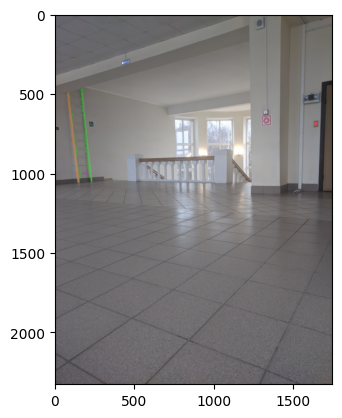

In [7]:
import matplotlib.pyplot as plt

plt.imshow(cv2pil(visuals[0]))

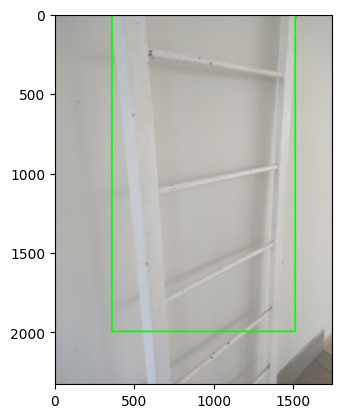

In [8]:
plt.imshow(cv2pil(prompt_img))

In [ ]:
# segment with text prompt
text_prompt = {"text": "ladder"}
outputs_per_frame = segment_on_vigeo(predictor, image_path, box_prompt, prompt_idx=3)
prompt_img, visuals = visualize_on_frames(
    image_path, outputs_per_frame, text_prompt, prompt_idx=3
)

propagate_in_video:   0%|          | 0/1 [00:00<?, ?it/s]

propagate_in_video:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
plt.imshow(cv2pil(put_prompt_on_frame(text_prompt, visuals[0])))